In [423]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [467]:
df = pd.read_csv("/home/deepp/rebelway/week04/breast cancer.csv")

In [468]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [470]:
#drop columns Unnamed: 32 and id
df.drop("Unnamed: 32", axis=1, inplace=True)
df.drop("id", axis=1, inplace=True)

In [471]:
# convert the diagnosis coulmn to Bool and renamed malign
diagnosis = pd.get_dummies(df["diagnosis"], drop_first=True)
df.drop("diagnosis", axis=1, inplace=True)
df = pd.concat([df,diagnosis], axis=1, ignore_index=False)
df = df.rename(columns={"M": "malign"})

<Axes: >

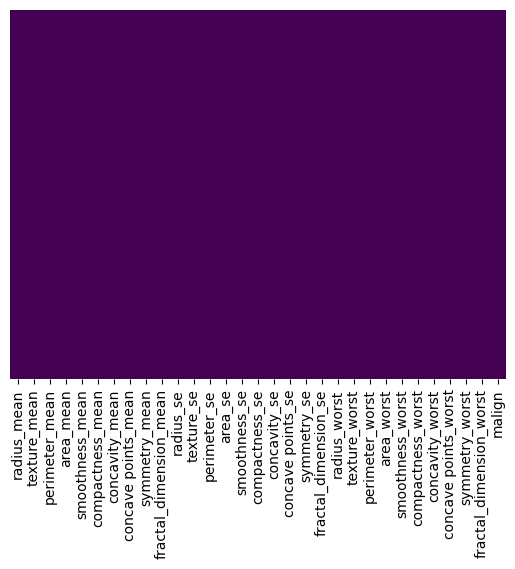

In [472]:
# check for NAN values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

# MODEL

In [473]:
from sklearn.model_selection import train_test_split

In [474]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["malign"], axis=1), df["malign"], test_size=0.3, random_state=102)

In [475]:
from sklearn.linear_model import LogisticRegression

In [476]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [477]:
predictions = model.predict(X_test)

In [478]:
from sklearn.metrics import classification_report

In [479]:
full_report = classification_report(y_test, predictions)
print(full_report)

              precision    recall  f1-score   support

       False       0.96      0.97      0.96       112
        True       0.95      0.92      0.93        59

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [480]:
print("Coef: ", model.coef_)

Coef:  [[-0.67875213 -0.15603768  0.36425785 -0.03497833  0.11821458  0.16405457
   0.32413566  0.19573759  0.16276786  0.02411274  0.11722711 -1.10362231
  -0.58473117  0.1582844   0.01207997 -0.03053442  0.00567891  0.01974642
   0.01230758 -0.00349072  0.04371803  0.40779209  0.16794165  0.00792588
   0.26884211  0.58774325  0.98991736  0.40246305  0.43522128  0.08275821]]


In [481]:
# checking coeff of each input
#pd.DataFrame(zip(X_train.columns, model.coef_[0]))

In [482]:
# plot each column to check for outliers
#for i in range(len(df.columns)):
#    if df.columns[i] != ("malign"):
#        df.reset_index().plot(kind='scatter', x="index", y=df.columns[i])

In [483]:
# removing outliers
for i in range(len(df.columns)):
    if df.columns[i] != ("malign"):
        q_low = df[df.columns[i]].quantile(0.01)
        q_hi  = df[df.columns[i]].quantile(0.99)
        
        df_filtered = df[(df[df.columns[i]] < q_hi) & (df[df.columns[i]] > q_low)]

#df_filtered.info()

In [484]:
# model without outlier
X_train, X_test, y_train, y_test = train_test_split(df_filtered.drop(["malign"], axis=1), df_filtered["malign"], test_size=0.3, random_state=102)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
filterd_report = classification_report(y_test, predictions)
print(filterd_report)

              precision    recall  f1-score   support

       False       0.96      0.99      0.97       115
        True       0.98      0.91      0.94        53

    accuracy                           0.96       168
   macro avg       0.97      0.95      0.96       168
weighted avg       0.96      0.96      0.96       168



In [493]:
#checking if removing one column brings better predictions
df = df_filtered
original =df
accuracy = []
for i in range(len(df.columns)):
    if df.columns[i] != ("malign"):
        #print("Excluded: ", df.columns[i])
        df = df.drop(df.columns[i], axis=1)
        X_train, X_test, y_train, y_test = train_test_split(df.drop(["malign"], axis=1), df["malign"], test_size=0.3, random_state=102)
        model = LogisticRegression(max_iter=10000)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)  
        report = classification_report(y_test, predictions, output_dict=True)
        accuracy.append(report["accuracy"])
        #print(report)
        #print()
        df=original

max_accuracy = (accuracy.index(max(accuracy)))
print("Drop: ", df.columns[max_accuracy], " to get", max(accuracy), "accuracy")

Drop:  area_se  to get 0.9702380952380952 accuracy


In [486]:
df = df_filtered.drop("area_se", axis=1)
X_train, X_test, y_train, y_test = train_test_split(df.drop(["malign"], axis=1), df["malign"], test_size=0.3, random_state=102)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98       115
        True       1.00      0.91      0.95        53

    accuracy                           0.97       168
   macro avg       0.98      0.95      0.96       168
weighted avg       0.97      0.97      0.97       168



In [489]:
# drop area_se column and repeat if we get better predictions dropping one column
df = df_filtered.drop("area_se", axis=1)
original =df
accuracy = []
for i in range(len(df.columns)):
    if df.columns[i] != ("malign"):
        #print("Excluded: ", df.columns[i])
        df = df.drop(df.columns[i], axis=1)
        X_train, X_test, y_train, y_test = train_test_split(df.drop(["malign"], axis=1), df["malign"], test_size=0.3, random_state=102)
        model = LogisticRegression(max_iter=10000)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)  
        report = classification_report(y_test, predictions, output_dict=True)
        accuracy.append(report["accuracy"])
        #print(report)
        #print()
        df=original

max_accuracy = (accuracy.index(max(accuracy)))
print("Drop: ", df.columns[max_accuracy], " to get", max(accuracy), "accuracy")

Drop:  area_worst  to get 0.9761904761904762 accuracy


In [490]:
# droppin area_se and area_worst improve the prediction
df = df_filtered.drop(["area_se","area_worst"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df.drop(["malign"], axis=1), df["malign"], test_size=0.3, random_state=102)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
filter_cleaned_report = classification_report(y_test, predictions)
print(filter_cleaned_report)

              precision    recall  f1-score   support

       False       0.97      1.00      0.98       115
        True       1.00      0.92      0.96        53

    accuracy                           0.98       168
   macro avg       0.98      0.96      0.97       168
weighted avg       0.98      0.98      0.98       168



In [491]:
# checking if dropping one column gives better predictions
df = df_filtered.drop(["area_se","area_worst"], axis=1)
original =df
accuracy = []
for i in range(len(df.columns)):
    if df.columns[i] != ("malign"):
        #print("Excluded: ", df.columns[i])
        df = df.drop(df.columns[i], axis=1)
        X_train, X_test, y_train, y_test = train_test_split(df.drop(["malign"], axis=1), df["malign"], test_size=0.3, random_state=102)
        model = LogisticRegression(max_iter=10000)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)  
        report = classification_report(y_test, predictions, output_dict=True)
        accuracy.append(report["accuracy"])
        #print(report)
        #print()
        df=original

max_accuracy = (accuracy.index(max(accuracy)))
print("Drop: ", df.columns[max_accuracy], " to get", max(accuracy), "accuracy")

Drop:  texture_mean  to get 0.9761904761904762 accuracy


In [449]:
print("Report using full dataset:")
print(full_report)
print()
print("Report removing outliers from dataset:")
print(filterd_report)
print()
print("Report removing outliers and dropping two columns from dataset:")
print(filter_cleaned_report)
print()

Report using full dataset:
              precision    recall  f1-score   support

       False       0.96      0.97      0.96       112
        True       0.95      0.92      0.93        59

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171


Report removing outliers from dataset:
              precision    recall  f1-score   support

       False       0.96      0.99      0.97       115
        True       0.98      0.91      0.94        53

    accuracy                           0.96       168
   macro avg       0.97      0.95      0.96       168
weighted avg       0.96      0.96      0.96       168


Report removing outliers and dropping two columns from dataset:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       115
        True       1.00      0.92      0.96        53

    accuracy                           0.98       